# Instance Based Learning

Key ideas:
* training: simply store all training examples
* classification: compute only locally the target function
* Inductive bias: the classification of query/test instance $x_q$ will be most similar to the classification of training instances that are nearby

Advantages:
* can learn very complex target functions
* training is very fast
* don't lose information
* robust to noisy training

Disadvantages:
* slow at query time
* easily fooled by irrelevant attributes (the curse of dimensionality)

# k-Nearest Neighbour

## Algorithm

Training:
* Store all training examples

Classification:
* Given a query/test instance $x_q$, first locate the $k$ nearest training examples $x_1,...,x_k$, then estimate $\hat{f}(x_q)$:
 * in case of *discrete-valued* $f=\mathbb{R}^n \rightarrow V$, take a vote among its k nearest neighbours
 $$\hat{f}(x_q) \leftarrow \text{argmax}_{v\in V}\sum_{i=1}^{k} \delta(v, f(x_i))$$
 where $\delta(a,b)=1$ if $a=b$, and $\delta(a,b)=0$ if $a \neq b$
 * in case of *continuous-valued* $f$, take the mean of the $f$ values of its $k$ nearest neighbours
 $$\hat{f}(x_q) \leftarrow \frac{\sum_{i=1}^kf(x_i)}{k}$$

## Classification

Given a dataset like the following:

In [1]:
import pandas as pd
d = pd.DataFrame({
    'X1': [-1, 0, 0, 1, 1, 1, 2, 2],
    'X2': [1, 1, 2, -1, 0, 2, 2, 3],
    'Y': [0, 1, 0, 0, 1, 1, 0, 1]
})
X, Y = d[['X1', 'X2']], d['Y']

which we can plot using `matplotlib` with:

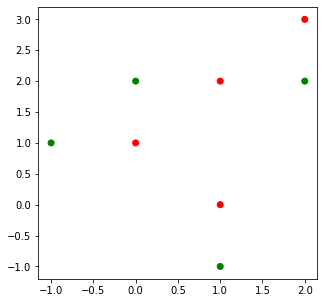

In [2]:
import matplotlib.pyplot as plt
c= ['green' if l == 0 else 'red' for l in Y]
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X['X1'], X['X2'], color=c)
plt.show()

we can use `KNeighborsClassifier` from `sklearn.neighbors` to classify the point at (0, 0) for $k=3$ neighbours:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
knn.predict([[0, 0]])

array([1])

Very similar to the previous algorithms, the `predict_proba` give us the probability for each instance to be in each class. In the example above, for one point in class 0 and two points in class 1, the probabilities will be 1/3 and 2/3:

In [4]:
knn.predict_proba([[0, 0]])

array([[0.33333333, 0.66666667]])

We can visualise the decision surface using `matplotlib`:

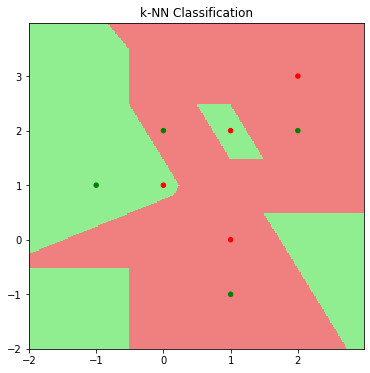

In [5]:
from tools.plots import plot_decision_surface_knn
knn = KNeighborsClassifier(n_neighbors=3).fit(X, Y)
plot_decision_surface_knn(knn, X, Y)

As expected, the point (0, 0) falls in the red area.

In the particular case of $k=1$, the resulting decision boundaries correspond to a _Voronoi diagram_, which splits the surface into zones based on the closest point:

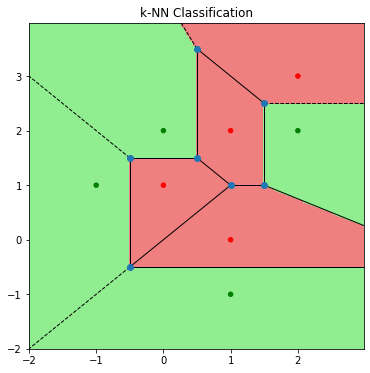

In [6]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, Y)
plot_decision_surface_knn(knn, X, Y, voronoi=True)

---
**Give it a try!**

`KNeighborsClassifier` can work with Manhattan distance instead of Euclidean distance by changing the value of the `p` paramater from 2 to 1.

Plot the decision surface of 1-NN using Manhattan distance.

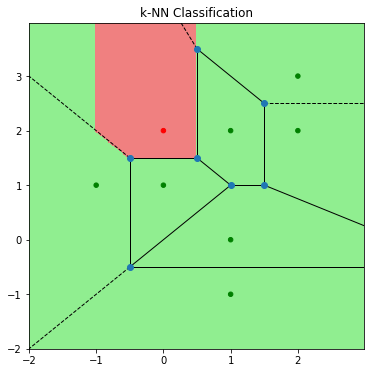

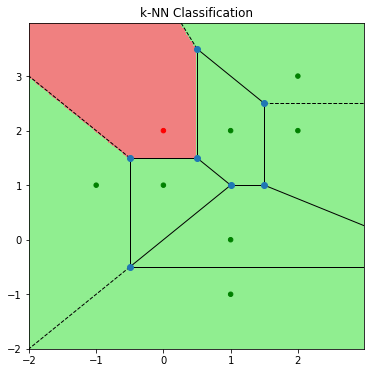

In [13]:
import pandas as pd
d = pd.DataFrame({
    'X1': [-1, 0, 0, 1, 1, 1, 2, 2],
    'X2': [1, 1, 2, -1, 0, 2, 2, 3],
    'Y': [0, 0, 1, 0, 0, 0, 0, 0]
})
X, Y = d[['X1', 'X2']], d['Y']
# Your code here
knn = KNeighborsClassifier(n_neighbors=1, p = 1).fit(X, Y)
plot_decision_surface_knn(knn, X, Y, voronoi=True)

knn = KNeighborsClassifier(n_neighbors=1, p = 2).fit(X, Y)
plot_decision_surface_knn(knn, X, Y, voronoi=True)

---

### Applying weights

By default, all points in each neighborhood are weighted equally, meaning that for 3-NN the classification will always be the majority, regardless of how far each training point is from the predicted one. An alternative to this is to take into consideration the distances by switching the `weights` parameter from `"uniform"` to `"distance"` which weights training points by the inverse of their distance.

---
**Give it a try!**

Create a dataset and train that `KNeighborsClassifier` with the two types of weighing to illustrates the difference between `"uniform"` and `"distance"`. In the simplest case, you can create a triangle and plot the decision surface for 3-NN in the two cases.

   X1  X2  Y
0   3   4  0
1   5   7  0
2  15  15  1
[[0.66666667 0.33333333]]
[[0.92609066 0.07390934]]


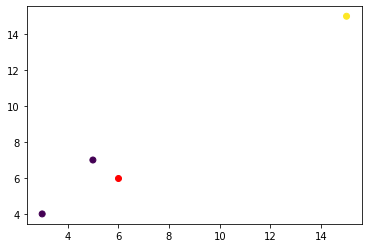

In [46]:
# Your code here
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from tools.plots import plot_decision_surface_knn
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(10)
npoints = 2
d = pd.DataFrame({
    'X1': [3, 5, 15], #np.append(np.random.randint(0, 5, npoints), 15),
    'X2': [4, 7, 15], #np.append(np.random.randint(0, 5, npoints), 15),
    'Y': [0, 0, 1]#np.random.randint(0,2, npoints + 1)
})
X, Y = d[['X1', 'X2']], d['Y']
print(d)
# Your code here
knn = KNeighborsClassifier(n_neighbors=3, weights="uniform").fit(X, Y)
plt.scatter(d[['X1']], d[['X2']], c = d['Y'])
plt.scatter(6, 6, c = 'red')
print(knn.predict_proba([[0,0]]))

knn = KNeighborsClassifier(n_neighbors=3, weights="distance").fit(X, Y)
print(knn.predict_proba([[6,6]]))

---

## Regression

On the same dataset as before, we can use `KNeighborsRegressor` to predict the numeric value of point (0, 0), considering Y as being a number rather than a class:

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X, Y)
knn.fit(X, Y)
knn.predict([[0, 0]])

array([0.])

## Measuring accuracy

### Training accuracy

For the classifier, the `score` function returns the accuracy on the given dataset and labels:

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
knn.score(X, Y)

0.875

We can quickly check this number by having a look at the visualisation above for 3-NN and counting how many points end up in the zone of the same colour. We can see that only 2 red points and 1 green point are correctly classified, which means that the accuracy is $\frac{3}{8}=0.375$.

For the regressor, the `score` function returns the coefficient of determination $R^2$ for the prediction:

In [11]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, Y)
knn.score(X, Y)

0.11111111111111094

## Cross-validation accuracy

Cross-validation works with the usual functions `cross_val_score` and `LeaveOneOut`:

In [12]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from statistics import mean
loo = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, Y, cv=loo)
print("CVLOO scores:", scores)
print("Mean CVLOO score: ", mean(scores))

CVLOO scores: [1. 1. 0. 1. 1. 1. 1. 1.]
Mean CVLOO score:  0.875
